# 1) Data Cleaning  starting with r/aliens

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
import datetime
import regex as re



%matplotlib inline

pd.set_option("display.max_columns", None)

from bs4 import BeautifulSoup
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS

# importing NLP packages
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS

# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
import datetime
import regex as re



from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

# importing NLP packages
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

%matplotlib inline

pd.set_option("display.max_columns", None)

from bs4 import BeautifulSoup
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS


In [2]:
#retrieve the csv files extracted 

aliens = pd.read_csv('./data/aliens_submissions.csv', low_memory=False)

In [3]:
print(aliens.shape)


(9996, 86)


In [4]:
aliens.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_is_blocked',
       'author_patreon_flair', 'author_premium', 'awarders', 'can_mod_post',
       'contest_mode', 'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_created_from_ads_ui', 'is_crosspostable', 'is_meta',
       'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable',
       'is_self', 'is_video', 'link_flair_background_color',
       'link_flair_css_class', 'link_flair_richtext', 'link_flair_template_id',
       'link_flair_text', 'link_flair_text_color', 'link_flair_type', 'locked',
       'media_only', 'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'pwls',
       'retrieved_on', 'score', 'selftext', 'send_replies', 'spoiler',
       'stickied', 'subreddit', 'subreddit_id', 'subreddit_sub

In [5]:
#Select columns to be extracted that will be useful for EDA
def extract_cols(df):
    return df[['subreddit','id','selftext','title', 'author', 'created_utc', 'score', 
              'num_comments', 'upvote_ratio']]

In [6]:
aliens = extract_cols(aliens)

In [7]:
aliens.shape

(9996, 9)

In [8]:
aliens.head()

,subreddit,id,selftext,title,author,created_utc,score,num_comments,upvote_ratio
0,aliens,t4wova,I just woke up from a crazy alien dream! It st...,Aliens shot me with a subatomic particle beam ...,knowledgeCaterpillar,1646214399,1,0,1.0
1,aliens,t4wf68,I live in the south so we'll usually hear guns...,maybe an alien ?,opism_ex,1646213158,1,0,1.0
2,aliens,t4w4gg,NaN,HUMAN-ALIEN hybrid lives in India! #Shorts,Dan_Vasilache,1646211873,1,0,1.0
3,aliens,t4v5ik,[removed],UFO sighting,Wookiesarepeopletoo_,1646207848,1,0,1.0
4,aliens,t4ulla,What are signs that someone’s been abducted? A...,Signs you’ve been abducted,Theespacebaby,1646205635,1,0,1.0


In [9]:
#check for any duplicates
def duplicate_id(df):
    
    duplicate = df[df.duplicated('id')]
    count = duplicate['id'].count()

    print(f"Duplicate id counts in  : {count}")

In [10]:
duplicate_id(aliens)

Duplicate id counts in  : 0


In [11]:
#check for null values

aliens.isnull().sum()

subreddit          0
id                 0
selftext        4333
title              0
author             0
created_utc        0
score              0
num_comments       0
upvote_ratio       0
dtype: int64

The submissions’ selftext would an empty string if a link post. Hence, we will be replacing the null values within selftext as 'NA' instead. 

# 2) Repeat same steps for r/conspiracytheories


In [12]:
#retrieve the csv files extracted 

ct = pd.read_csv('./data/ct_submissions.csv', low_memory = False)

ct.shape

(9999, 85)

In [13]:
ct = extract_cols(ct)
ct.head()

,subreddit,id,selftext,title,author,created_utc,score,num_comments,upvote_ratio
0,conspiracytheories,t4twuy,There have been several things in world histor...,Did someone invent time travel?,Aintsosimple,1646202980,1,0,1.0
1,conspiracytheories,t4tbku,[removed],Did you know that moderna is a Ukrainian compa...,Numerous_Cut_5410,1646200837,1,0,1.0
2,conspiracytheories,t4taka,Theory: They can't get their more advanced cra...,UAP/Non-human intelligence is interfering with...,Light-based,1646200764,1,0,1.0
3,conspiracytheories,t4t9j8,What if the Mandela effect is actually the gov...,Mandela effect?,sbspixie,1646200667,1,0,1.0
4,conspiracytheories,t4t08c,[removed],"Beige listed still owes me $1,000",Numerous_Cut_5410,1646199782,1,0,1.0


In [14]:
duplicate_id(ct)

Duplicate id counts in  : 0


In [15]:
ct.isnull().sum()

subreddit          0
id                 0
selftext        4834
title              0
author             0
created_utc        0
score              0
num_comments       0
upvote_ratio       0
dtype: int64

The submissions’ selftext would an empty string if a link post. Hence, we will be replacing the null values within selftext as 'NA' instead. 

# 3) Replace null values with 'NA', convert UTC to datetime

In [16]:

aliens["selftext"].fillna("NA", inplace = True)
ct["selftext"].fillna("NA", inplace = True)

In [17]:
#aliens.isnull().sum()

In [18]:
#ct.isnull().sum()

In [19]:
aliens['created_utc'] = pd.to_datetime(aliens['created_utc'], unit = 's')
ct['created_utc'] = pd.to_datetime(ct['created_utc'], unit = 's')

# 4) Explore % of posts that are in text (e.g. not links or images) 

In [20]:
ct.shape

(9999, 9)

In [21]:
aliens.shape

(9996, 9)

In [22]:
aliens_nontext= aliens.loc[aliens['selftext'] == 'NA', 'selftext'].count()
aliens_nontext

4333

In [23]:
ct_nontext= ct.loc[ct['selftext'] == 'NA', 'selftext'].count()
ct_nontext

4834

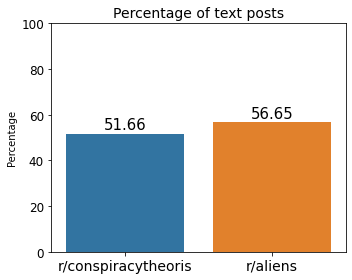

In [24]:
ct_text = ((ct.shape[0] - ct_nontext)/ ct.shape[0]) * 100
aliens_text = ((aliens.shape[0] - aliens_nontext)/ aliens.shape[0]) * 100

plt.figure(figsize = (5,4))
plots = sns.barplot(y = [ct_text, aliens_text], x = ['r/conspiracytheoris','r/aliens'])

for bar in plots.patches:
   
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 9),
                   textcoords='offset points')
    
plt.title('Percentage of text posts', fontsize=14)
plt.ylim(0,100)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel('Percentage')

plt.tight_layout()


Both subreddits contain similar percentages of text posts at around 50%. There is still content in the 'title' columns that will be useful in training the model. Hence the posts that are not text posts will not be removed. 

# 5) Observe for datetime trends in the dataset

<AxesSubplot:>

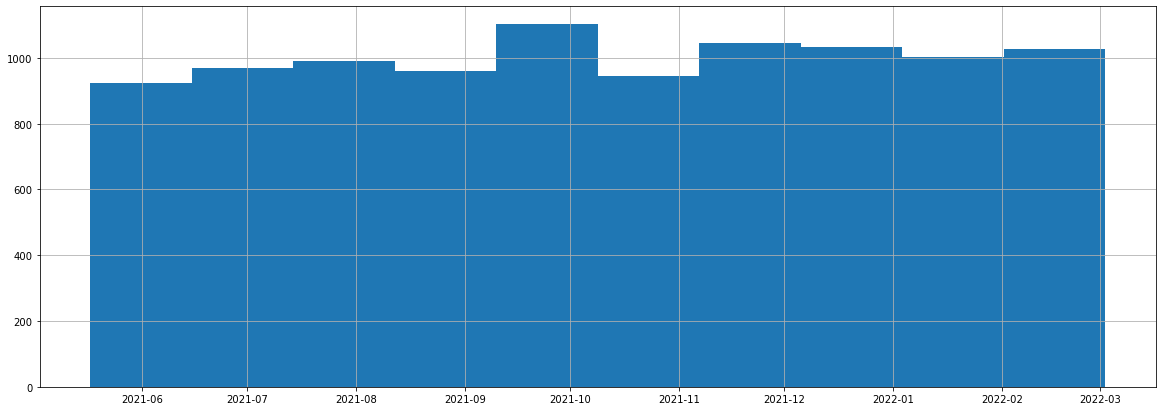

In [25]:
ct['created_utc'].hist(figsize = (20,7))

<AxesSubplot:>

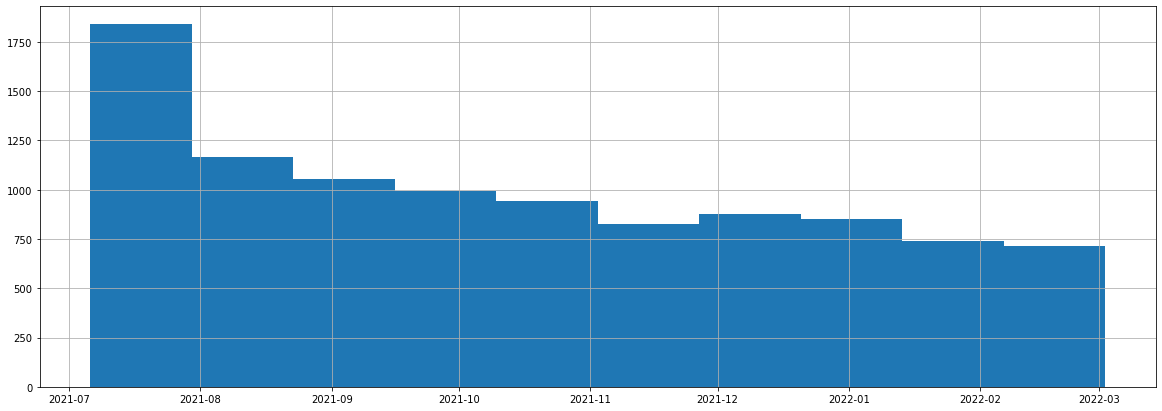

In [26]:
aliens['created_utc'].hist(figsize = (20,7))

r/conspiracytheories was able to maintain a consistent number of posts per month from june 2021 to March 2022 between 900-1100 posts. On the other hand, r/aliens saw a decline in the number of posts from more than 1750 posts in july 2021 to less than 750 posts a month. 

# 6) Visualize title lengths and post lengths

In [27]:
ct['title_len'] = [len(x) for x in ct['title'].str.split(' ')]
aliens['title_len'] = [len(x) for x in aliens['title'].str.split(' ')]

In [28]:
ct['text_len'] = [len(x) for x in ct['selftext'].str.split(' ')]
aliens['text_len'] = [len(x) for x in aliens['selftext'].str.split(' ')]

In [29]:
print(f"The average r/conspiracytheory title is: {ct['title_len'].mean()} words long")
print(f"The average r/aliens title is: {aliens['title_len'].mean()} words long")

The average r/conspiracytheory title is: 11.536053605360536 words long
The average r/aliens title is: 11.513605442176871 words long


C:\Users\wongs\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


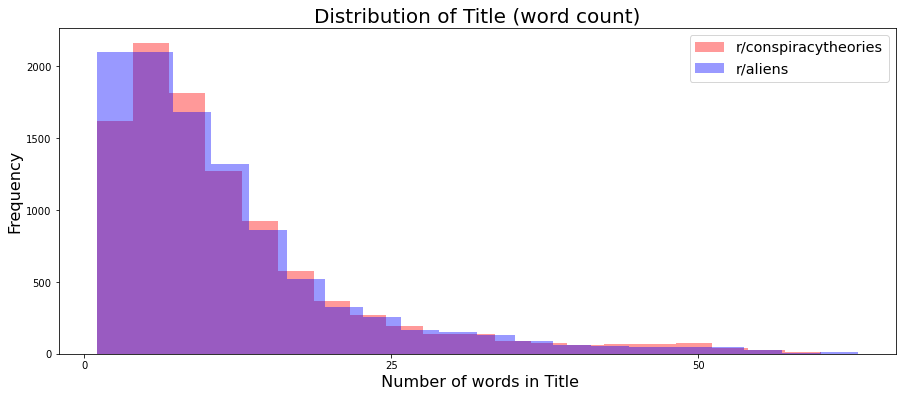

In [30]:
plt.figure(figsize=(15, 6))
sns.distplot(ct["title_len"], kde=False, bins=20, label="r/conspiracytheories", color="red")
sns.distplot(aliens["title_len"], kde=False, bins=20, label="r/aliens", color="blue")
plt.title("Distribution of Title (word count)", size=20)
plt.xlabel(" Number of words in Title", size=16)
plt.xticks(range(0, 75, 25))
plt.ylabel("Frequency", size=16)
plt.legend(fontsize="x-large");

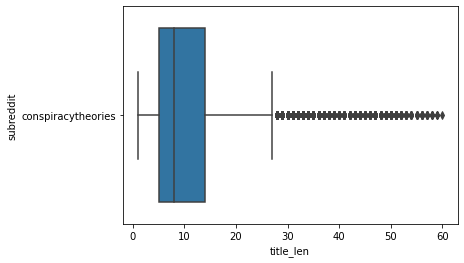

In [31]:
sns.boxplot( y=ct["subreddit"], x = ct['title_len'] );
plt.show()

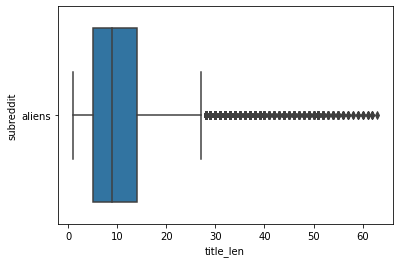

In [32]:
sns.boxplot( y=aliens["subreddit"], x = aliens['title_len'] );
plt.show()

In [33]:
print(f"The average r/conspiracytheory post is: {ct['text_len'].mean()} words long")
print(f"The average r/aliens post is: {aliens['text_len'].mean()} words long")

The average r/conspiracytheory post is: 40.964796479647966 words long
The average r/aliens post is: 88.41946778711484 words long


C:\Users\wongs\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


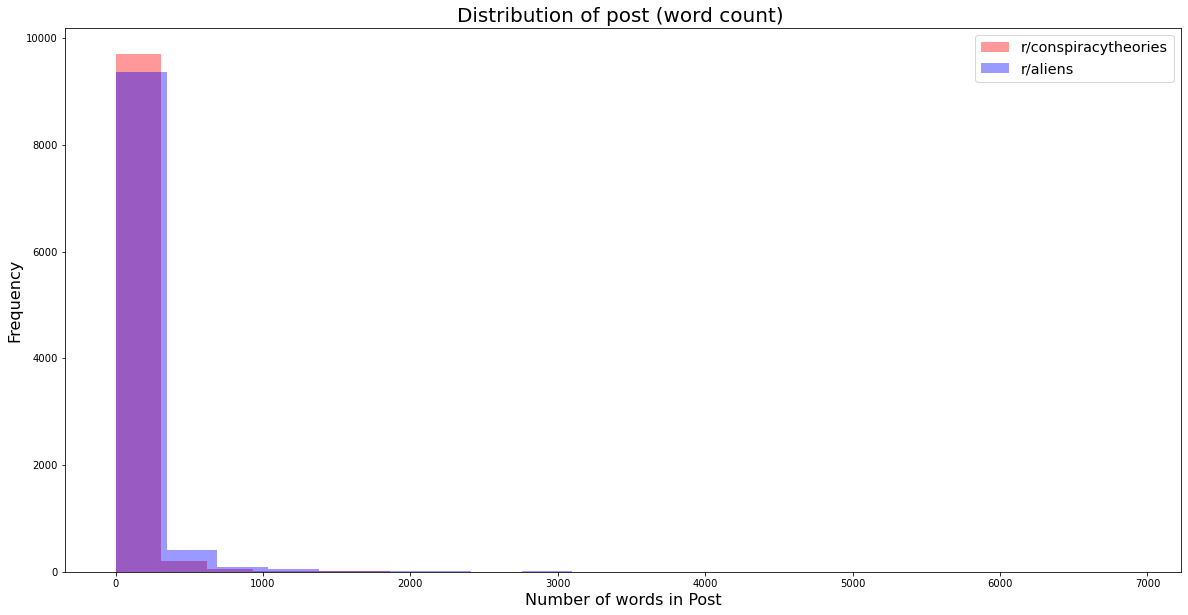

In [34]:
plt.figure(figsize=(20, 10))
sns.distplot(ct["text_len"], kde=False, bins=20, label="r/conspiracytheories", color="red")
sns.distplot(aliens["text_len"], kde=False, bins=20, label="r/aliens", color="blue")
plt.title("Distribution of post (word count) ", size=20)
plt.xlabel("Number of words in Post", size=16)
plt.ylabel("Frequency", size=16)
plt.legend(fontsize="x-large");

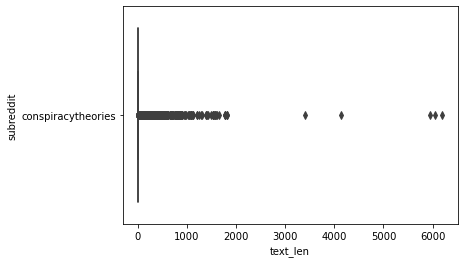

In [35]:
sns.boxplot( y=ct["subreddit"], x = ct['text_len'] );
plt.show()

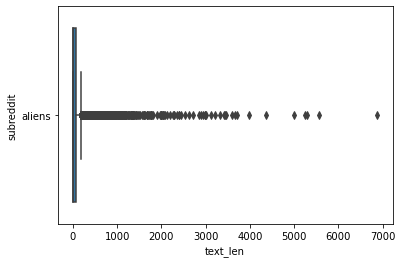

In [36]:
sns.boxplot( y=aliens["subreddit"], x = aliens['text_len'] );
plt.show()

r/aliens and r/conspiracytheories are very similar in terms of the number of words in titles as well as posts. The title are on average around 11 words. For posts, r/conspiracytheories has shorter posts with 41 words on average while r/aliens have 89 words on average. However, it is observed that their posts have some outliers as well with posts more than 6000 words for both subreddits. 

In [37]:
ct.describe()

,score,num_comments,upvote_ratio,title_len,text_len
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,1.823182,12.334633,0.986985,11.536054,40.964796
std,30.864067,41.069772,0.076945,10.342189,171.810383
min,0.000000,0.000000,0.140000,1.000000,1.000000
25%,1.000000,0.000000,1.000000,5.000000,1.000000
50%,1.000000,0.000000,1.000000,8.000000,1.000000
75%,1.000000,7.000000,1.000000,14.000000,4.000000
max,2760.000000,1258.000000,1.000000,60.000000,6200.000000


In [38]:
aliens.describe()

,score,num_comments,upvote_ratio,title_len,text_len
count,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,1.345338,19.397059,0.994846,11.513605,88.419468
std,8.912065,57.622913,0.047944,9.712481,273.003249
min,0.000000,0.000000,0.110000,1.000000,1.000000
25%,1.000000,0.000000,1.000000,5.000000,1.000000
50%,1.000000,0.000000,1.000000,9.000000,1.000000
75%,1.000000,12.000000,1.000000,14.000000,73.000000
max,668.000000,1576.000000,1.000000,63.000000,6884.000000


Both r/aliens and 6/conspiracytheories have posts with more than 6000 words. I will have to look more into this to find out if the posts are related to the content.

In [39]:
#pd.set_option('display.max_colwidth', 100)

In [40]:
ct.loc[ct['text_len'] > 6000]

,subreddit,id,selftext,title,author,created_utc,score,num_comments,upvote_ratio,title_len,text_len
3750,conspiracytheories,qv2gti,"Let me say this, this is my belief. This is so...",A Theory For All the Ages: Part 1,ItalianStallion_25,2021-11-16 07:36:15,1,167,1.0,8,6057
9600,conspiracytheories,nmv7qq,July 18 and Hoaxers\n\nCommenting here was a ...,The Government has been keeping secrets on ali...,THM9000,2021-05-28 10:55:08,1,4,1.0,31,6200


In [41]:
aliens.loc[aliens['text_len'] > 6000]

,subreddit,id,selftext,title,author,created_utc,score,num_comments,upvote_ratio,title_len,text_len
3316,aliens,qzlbux,"**-This is a sacred text, a modern hymn to th...",Transcript of Chris Bledsoe's regression with ...,EarthAliens,2021-11-22 13:23:58,1,13,1.0,13,6884


After looking at this posts, the content within are indeed related to the subject matter of the subreddit and will be included in the dataset.


Further exploring the post on r/aliens with more than 6000 words,  it is a post regarding Chris Bledsoe who was visited by a mysterious entity.  Nearly a decade later, Chris Bledsor's son Ryan Bledsoe released a podcast of a hypnotic regression he did with Barbara Lamb. According to Ryan Bledsoe, Chris had conscious memory of the experience and recounted it in the interim.

# 7) Explore behaviors of users within the two subreddits

In [42]:
#create dataframes of values counts of users with each subreddit 

ct_user = ct.author.value_counts().reset_index().rename(
           columns={'index': 'name', 0:'count'})

aliens_user = aliens.author.value_counts().reset_index().rename(
           columns={'index': 'name', 0: 'count'})

In [43]:
print(f"No. of rows within r/conspiracytheories:", ct.shape[0])
print (f"Maximum no. of times a user has posted in r/conspiracytheories was:", ct_user['author'].max())
print(f"No. of users who have posted more than 20 times in r/conspiracytheories:", ct_user.loc[ct_user['author'] > 20, 'author'].count())

print('')
print(f"No. of rows within r/aliens:", aliens.shape[0])
print (f"Maximum no. of times a user has posted in r/aliens was:", aliens_user['author'].max())
print(f"No. of users who have posted more than 20 times in r/aliens:", aliens_user.loc[aliens_user['author'] > 20, 'author'].count())

No. of rows within r/conspiracytheories: 9999
Maximum no. of times a user has posted in r/conspiracytheories was: 473
No. of users who have posted more than 20 times in r/conspiracytheories: 19

No. of rows within r/aliens: 9996
Maximum no. of times a user has posted in r/aliens was: 152
No. of users who have posted more than 20 times in r/aliens: 31


In [44]:
bins = [0, 2, 4, 6, 8, 10, 20]
ct_user['binned'] = pd.cut(ct_user['author'], bins)
ct_user['binned'].value_counts(normalize=True)

(0, 2]      0.915495
(2, 4]      0.053967
(4, 6]      0.016158
(6, 8]      0.006625
(8, 10]     0.004201
(10, 20]    0.003555
Name: binned, dtype: float64

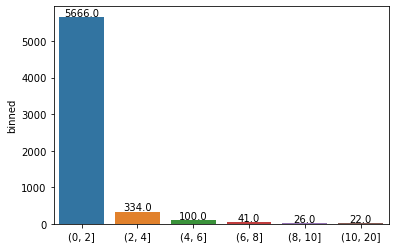

In [45]:
splot = sns.barplot(x=ct_user.binned.value_counts().index, y=ct_user.binned.value_counts())
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 4), 
                   textcoords = 'offset points')

In [46]:
bins = [0, 2, 4, 6, 8, 10, 20]
aliens_user['binned'] = pd.cut(aliens_user['author'], bins)
aliens_user['binned'].value_counts(normalize=True)

(0, 2]      0.881166
(2, 4]      0.071704
(4, 6]      0.020356
(6, 8]      0.010820
(10, 20]    0.009536
(8, 10]     0.006418
Name: binned, dtype: float64

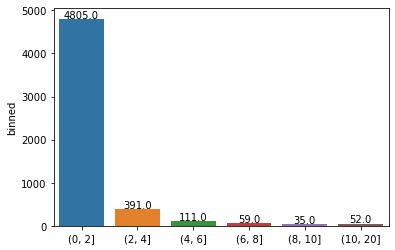

In [47]:
splot = sns.barplot(x=aliens_user.binned.value_counts().index, y=aliens_user.binned.value_counts())
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 4), 
                   textcoords = 'offset points')

Both r/conspiracytheories and r/aliens have more than 88% of users posting 1-2 posts and both subreddits also saw some power users that have posted more than 20 times with 19 users in r/conspiracytheories and 31 users in r/aliens.

# 6) Explore 'removed' and 'deleted' posts

I noticed that some of the selftext and author within the dataset were had been 'deleted' or 'removed'. Posts that were [removed] were done by moderators. [deleted] posts were done by the user. Next, I will explore the counts of deleted selftexts and authors. It is noticed that both columns, selftext and author could be labelled as deleted or removed but we are still able to see the content of the title. 

In [48]:
#creating a function
def rem_del_counts( column, df): 
    del_ct = df.loc[df[column] == '[deleted]',column].count()
    rem_ct = df.loc[df[column] == '[removed]',column].count()
    
    print(f'Count of posts with {column} labelled as [deleted]:', del_ct )
    print(f'Count of posts with {column} labelled as [removed]:', rem_ct )
    

In [49]:
rem_del_counts('selftext', aliens)

Count of posts with selftext labelled as [deleted]: 64
Count of posts with selftext labelled as [removed]: 781


In [50]:
rem_del_counts('selftext', ct)

Count of posts with selftext labelled as [deleted]: 39
Count of posts with selftext labelled as [removed]: 2489


In [51]:
#Explore posts that are removed - 2489 within r/conspiracytheories
#pd.set_option('display.max_colwidth', 100)
#pd.set_option('display.max_rows', 100)
#ct.loc[ct['selftext'] == '[removed]'].head(100)



Curious about the large number of posts that are moderated(['removed']), I explored these posts to see what content was deem inappropriate by moderators in r/conspiracytheories. Upon further look, I realised that the moderators removed these posts because they were controversial or with content that were not relevant to the subreddit. If I were to remove these posts, it can affect the distribution of the data that we will be feeding to the model. 


I have decided to remove the posts as keeping these posts may not be representative of the content within the two subreddits and resample the data before modelling so that the distribution of the number of data from the two datasets are equal. I will be retaining content that were ['deleted'] as this was done so by the user, not the moderators which indirectly meant that the content has met the rules of the subreddit.  

In [52]:
#drop columns with ['removed'] in selftext columns 

ct = ct[ct['selftext']!='[removed]']
aliens = aliens[aliens['selftext']!='[removed]']

print(f"Shape of ct after dropping moderator removed posts:", ct.shape)
print(f"Shape of aliens after dropping moderator removed posts:", aliens.shape)

Shape of ct after dropping moderator removed posts: (7510, 11)
Shape of aliens after dropping moderator removed posts: (9215, 11)


# 7) Check for overlaps between the two subreddits 
Check for any posts that were uploaded on both r/aliens and r/conspiracytheories. 

In [53]:
def crosspost( df1, df2): 

    #print the count of the number of the posts 
    df1_ct = df1[df1['title'].isin(df2['title']) == True].count()
    df2_ct = df2[df2['title'].isin(df1['title']) == True].count()
    
    print(f'Number of posts from aliens crossposted to conspiracytheories is :',df1_ct )
    print(f'Number of posts from conspiracytheories crossposted to aliens is :', df2_ct )
    
      #remove these overlap posts from the df 
    df1_rem = df1[df1['title'].isin(df2['title']) == True]
    df2_rem = df2[df2['title'].isin(df1['title']) == True]
    
    df1.drop(df1_rem.index, inplace = True)
    df2.drop(df2_rem.index, inplace = True)

    #print shape of the df after removing posts 
    print(' ')
    print(f'Shape of aliens after removing the overlap posts is:', df1.shape)
    print(f'Shape of conspiracytheories after removing the overlap posts is:', df2.shape)
  

In [54]:
crosspost(aliens, ct)

Number of posts from aliens crossposted to conspiracytheories is : subreddit       118
id              118
selftext        118
title           118
author          118
created_utc     118
score           118
num_comments    118
upvote_ratio    118
title_len       118
text_len        118
dtype: int64
Number of posts from conspiracytheories crossposted to aliens is : subreddit       102
id              102
selftext        102
title           102
author          102
created_utc     102
score           102
num_comments    102
upvote_ratio    102
title_len       102
text_len        102
dtype: int64
 
Shape of aliens after removing the overlap posts is: (9097, 11)
Shape of conspiracytheories after removing the overlap posts is: (7408, 11)


There were more than 100 similar posts crossposted in both subreddits. In this situation, these posts will have to be removed as the posts would affect the modelling process with same content appearing on both subreddits. 

# 8) Merge title and selftext to form a merged column.


In [55]:
pd.set_option('display.max_colwidth', 50)

In [56]:
#merge selftext column with title column
ct['merged'] = ct['title'] + ' ' + ct['selftext']
aliens['merged'] =aliens['title'] + ' ' + aliens['selftext']

# 9)Preprocess the content of merged column to show most common words


Next, I will be cleaning the merged column through the following methods to find the most common words before preprocessing. 


1) Apply lowercase to merged column 

2) Remove stopwords

Stop words are removed as they do not convey much meaning. By removing these words, we remove the low-level information from our text in order to give more focus to the important information. Additional words were included as well as these words come up very frequently in both subreddits like 'aliens', or 'conspiracy'. 

3) Remove links or webpages 

4) Convert emoticons to words

5) Stemming

6) Count Vectorize to extract single words or bigrams

### Preprocess (stopwords, links, emojis, convert to lowercase, stemming) 

In [57]:
#stopwords 

# list to store the standard + custom stop words
stop_words = stopwords.words('english')
#additional words to add on to stop_words 
add_words = ["na", "[deleted]", "like", "really", "it", "think", "know", "make", "ve", "going", "way", "want", "would"\
            "think", "us", "say", "actually", "right", "thing", "things", "x200b", "said", "anyone", "look"]

stop_words.extend(add_words)


#----------------------------------------
#function to remove links 

def remove_links (text):

    # remove html tags using BeautifulSoupw
    text = BeautifulSoup(text).get_text()
    # remove html links
    regex_html = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    text = re.sub(regex_html, r'', text, flags=re.MULTILINE)
    return text


#----------------------------------------
#function to convert emojis 

def convert_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
    return text

#----------------------------------------
# Stemming for text normalization
stemmer = PorterStemmer()

In [58]:
#Convert to lowercase
ct['merged'] = ct['merged'].apply(lambda x:x.lower())
aliens['merged'] = aliens['merged'].apply(lambda x:x.lower())

In [59]:
# remove stop words from both dfs
ct["merged"] = ct["merged"].apply(
    lambda x: " ".join([word for word in x.split() if word not in stop_words])
)
aliens["merged"] = aliens["merged"].apply(
    lambda x: " ".join([word for word in x.split() if word not in stop_words])
)

In [60]:
#remove links from both dfs 
ct['merged'] = ct['merged'].apply(lambda x:remove_links(x))
aliens['merged'] = aliens['merged'].apply(lambda x:remove_links(x))

C:\Users\wongs\anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "https://rokfin.com/stream/13613" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\Users\wongs\anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "https://www.youtube.com/watch?v=zi5wv2urosy" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\Users\wongs\anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "https://questiontheanswers.weebly.com/question-the-answers/4th-week-of-mass-protest-in-france-over-vaccine-passport-requirments" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client li

In [61]:
#convert emojis for both dfs
ct['merged'] = ct['merged'].apply(lambda x:convert_emojis(x))
aliens['merged'] = aliens['merged'].apply(lambda x:convert_emojis(x))

In [62]:
# stemming words to root form for both dfs
ct["merged"] = ct["merged"].apply(
    lambda x: " ".join([stemmer.stem(word) for word in x.split()])
)
aliens["merged"] = aliens["merged"].apply(
    lambda x: " ".join([stemmer.stem(word) for word in x.split()])
)

### Count vectorize to have the most common single words and bigrams in both subreddits 
Starting with single words for both subreddits 
then bigrams for both subreddit 

In [63]:
#r/conspiracytheories most used words 

# instantiating a cvec for single words
ct_cvec = CountVectorizer(stop_words = ENGLISH_STOP_WORDS, ngram_range=(1, 1))

# fitting/transforming the merged column 
ct_word_cvec = ct_cvec.fit_transform(ct["merged"])

# making a dataframe of the vectors
ct_word1_df = pd.DataFrame(ct_word_cvec.toarray(),
                                columns=ct_cvec.get_feature_names())
# getting the top 20 most used words
c1 = ct_word1_df.sum().sort_values(ascending=False).head(20)

In [64]:

#r/conspiracytheories most common bigrams 

# instantiating a cvec for bigrams
ct_cvec = CountVectorizer(stop_words = ENGLISH_STOP_WORDS, ngram_range=(2, 2))

# fitting/transforming merged column 
ct_word_cvec = ct_cvec.fit_transform(ct["merged"])

# making a dataframe of the vectors
ct_word2_df = pd.DataFrame(ct_word_cvec.toarray(),
                                columns=ct_cvec.get_feature_names())
# getting the top 20 most used words
c2 = ct_word2_df.sum().sort_values(ascending=False).head(20)

In [65]:
#r/aliens most used words 


# instantiating a cvec for single words
aliens_cvec = CountVectorizer(stop_words = ENGLISH_STOP_WORDS, ngram_range=(1, 1))

# fitting/transforming the merged column 
aliens_word_cvec = aliens_cvec.fit_transform(aliens["merged"])

# making a dataframe of the vectors
aliens_word1_df = pd.DataFrame(aliens_word_cvec.toarray(),
                                columns=aliens_cvec.get_feature_names())
# getting the top 20 most used words
a1 = aliens_word1_df.sum().sort_values(ascending=False).head(20)

In [66]:

#r/aliens most common bigrams 


# instantiating a cvec for bigrams
aliens_cvec= CountVectorizer( ngram_range=(2, 2))


# fitting/transforming merged column 
aliens_word_cvec = aliens_cvec.fit_transform(aliens["merged"])

# making a dataframe of the vectors
aliens_word2_df = pd.DataFrame(aliens_word_cvec.toarray(), columns=aliens_cvec.get_feature_names())
# getting the top 20 most used words
a2 = aliens_word2_df.sum().sort_values(ascending=False).head(20)

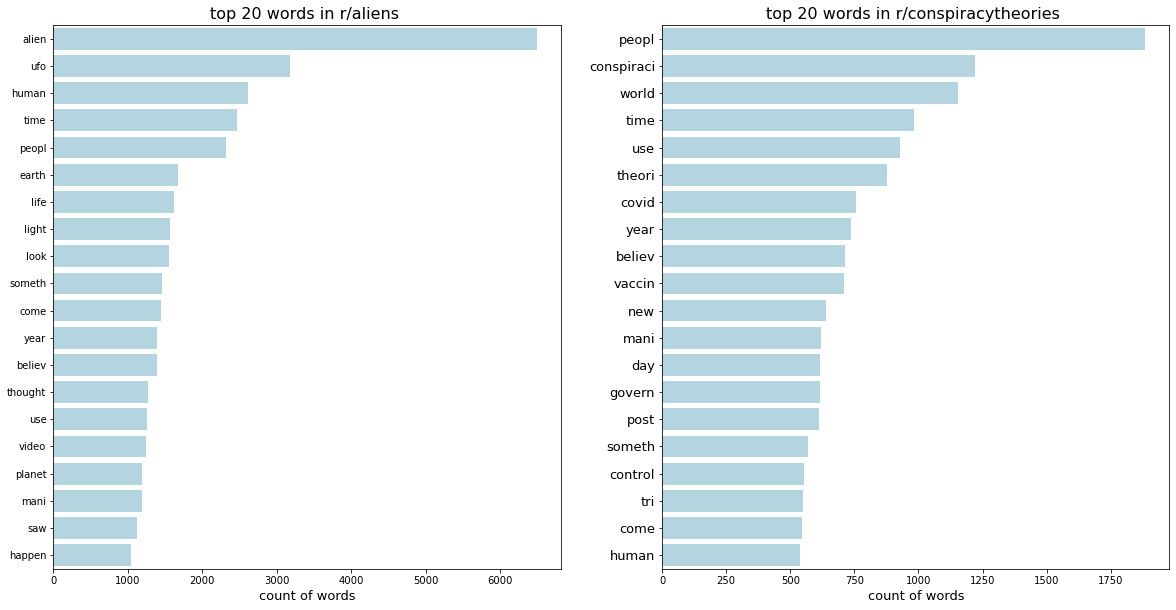

In [67]:
fit, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(20,10))
sns.barplot(y=a1.index.values, x = a1 ,ax=ax[0], color = 'lightblue')
ax[0].set_title('top 20 words in r/aliens ',fontsize=16)
ax[0].set_xlabel('count of words', fontsize=13)
plt.setp(ax[1].get_yticklabels(), fontsize=15)


sns.barplot(y=c1.index.values, x = c1 ,ax=ax[1], color = 'lightblue')
ax[1].set_title('top 20 words in r/conspiracytheories ',fontsize=16)
ax[1].set_xlabel('count of words', fontsize=13)
plt.setp(ax[1].get_yticklabels(), fontsize=13);

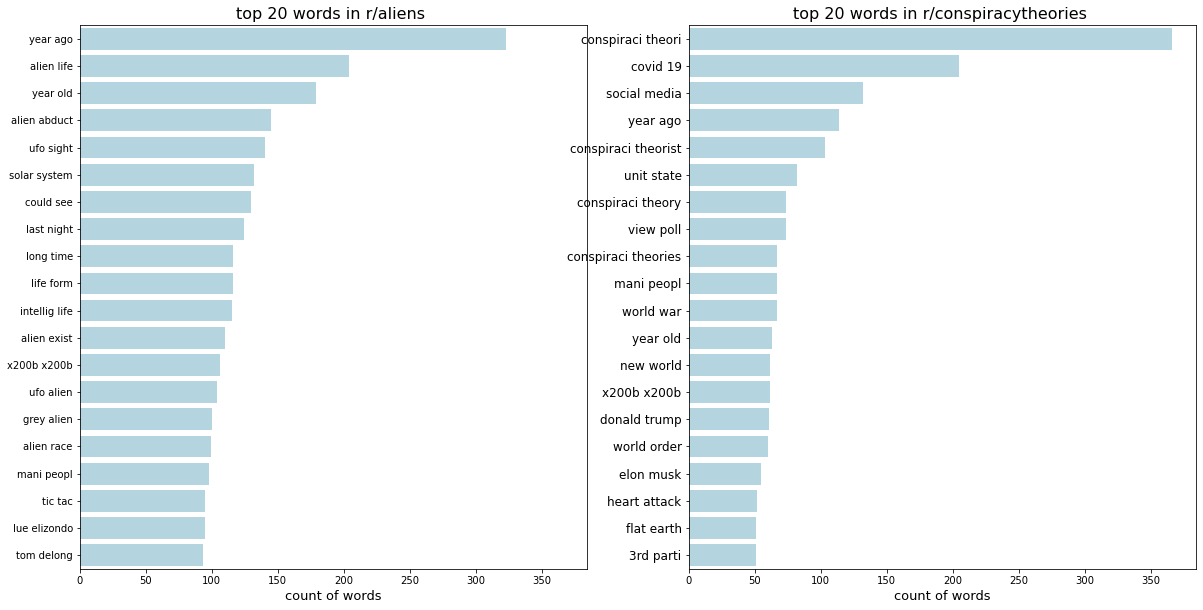

In [68]:
fit, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(20,10), sharex = True)
sns.barplot(y=a2.index.values, x = a2 ,ax=ax[0], color = 'lightblue')
ax[0].set_title('top 20 words in r/aliens ',fontsize=16)
ax[0].set_xlabel('count of words', fontsize=13)
plt.setp(ax[1].get_yticklabels(), fontsize=15)


sns.barplot(y=c2.index.values, x = c2 ,ax=ax[1], color = 'lightblue')
ax[1].set_title('top 20 words in r/conspiracytheories ',fontsize=16)
ax[1].set_xlabel('count of words', fontsize=13)
plt.setp(ax[1].get_yticklabels(), fontsize=12);

# 10) Sentiment analysis 

In [69]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [70]:
ct['Subjectivity'] = ct['merged'].apply(getSubjectivity) 
ct['Polarity'] = ct['merged'].apply(getPolarity) 
ct['Analysis'] = ct['Polarity'].apply(analysis)

In [71]:
ct_counts = ct.Analysis.value_counts(normalize=True)

ct_counts

Neutral     0.447354
Positive    0.313310
Negative    0.239336
Name: Analysis, dtype: float64

In [72]:
pd.set_option('display.max_colwidth', 100)

In [73]:
aliens['Subjectivity'] = aliens['merged'].apply(getSubjectivity) 
aliens['Polarity'] = aliens['merged'].apply(getPolarity) 
aliens['Analysis'] = aliens['Polarity'].apply(analysis)

In [74]:
aliens_counts = aliens.Analysis.value_counts(normalize=True)

aliens_counts

Positive    0.366714
Negative    0.345389
Neutral     0.287897
Name: Analysis, dtype: float64

[None, None, None, None, None, None]

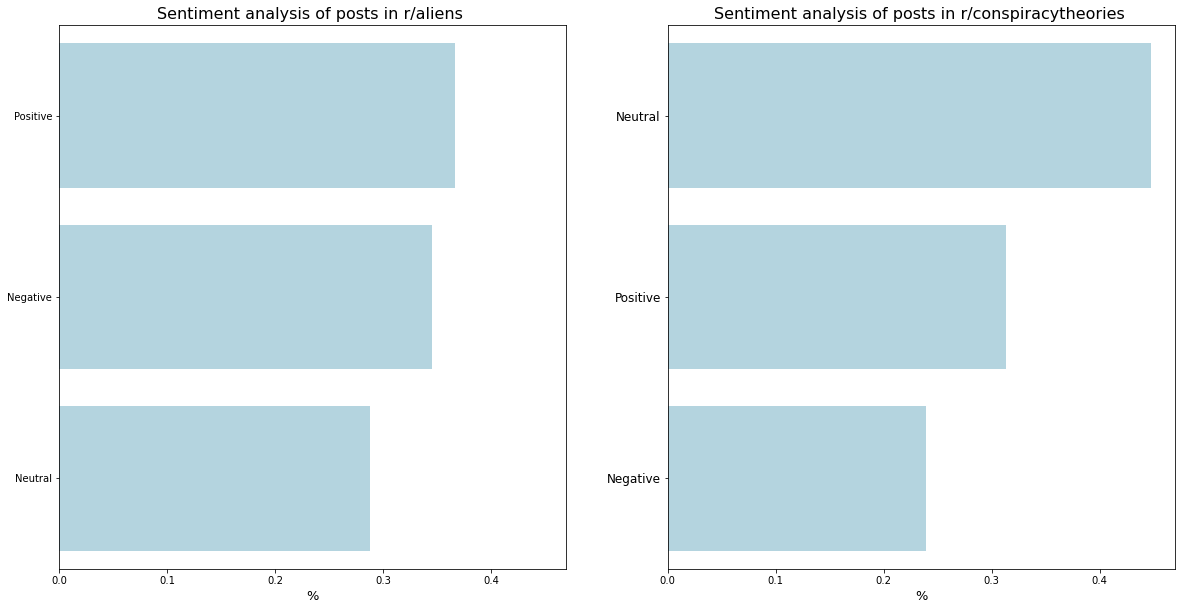

In [75]:
fit, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(20,10), sharex = True)
sns.barplot(y=aliens_counts.index.values, x = aliens_counts ,ax=ax[0], color = 'lightblue')
ax[0].set_title('Sentiment analysis of posts in r/aliens ',fontsize=16)
ax[0].set_xlabel('%', fontsize=13)
plt.setp(ax[1].get_yticklabels(), fontsize=15)

sns.barplot(y=ct_counts.index.values, x = ct_counts ,ax=ax[1], color = 'lightblue')
ax[1].set_title('Sentiment analysis of posts in r/conspiracytheories ',fontsize=16)
ax[1].set_xlabel('%', fontsize=13)
plt.setp(ax[1].get_yticklabels(), fontsize=12)


Through the sentiment analysis, we are able to notice that most of the posts on r/aliens are positive, followed by negative posts and neutral posts. 

On the other hand for r/conspiracy theories, most of the posts are neutral followed by positive posts. This could be due to the highly moderated posts within the subreddit. Over 2000 posts were moderated, wqhich could explain why most of the posts within r/conspiracytheories are neutral.

# 11) Final steps before modelling 

After removing the moderated posts, the size of both datasets are different. Hence, I will be random sampling r/aliens, taking 7408 rows of data to match r/conspiracytheories before modelling 

In [76]:
aliens.shape


(9097, 15)

In [77]:
ct.shape

(7408, 15)

In [78]:
#random sampling without replacement 
subset_aliens = aliens.sample(n=7408, replace=False)

In [79]:
subset_aliens.shape

(7408, 15)

In [80]:
# create dummy column for subreddits - 1 for r/aliens and 0 for r/conspiracytheories
ct['subreddit'] = 0
subset_aliens['subreddit'] = 1

# combine dataframes
df = pd.concat([ct, subset_aliens])
df.shape

(14816, 15)

In [82]:
# save to csv
df.to_csv('./data/fina_dataset.csv')